In [ ]:
from google.colab import files
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from matplotlib.pyplot import figure
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Загрузка и обработка входных данных

In [ ]:
uploaded = files.upload()

Saving Fifa 23 Players Data.csv to Fifa 23 Players Data.csv


In [ ]:
df = pd.read_csv('Fifa 23 Players Data.csv')

In [ ]:
df

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,D. Collins,Darren Collins,47,56,110000,"ST,RM",CAM,Republic of Ireland,https://cdn.sofifa.net/players/243/725/23_60.png,21,...,50,44,50,41,38,41,40,36,40,15
18535,Yang Dejiang,Dejiang Yang,47,57,90000,CDM,CDM,China PR,https://cdn.sofifa.net/players/261/933/23_60.png,17,...,45,45,45,47,48,47,49,49,49,15
18536,L. Mullan,Liam Mullan,47,67,130000,CM,RM,Northern Ireland,https://cdn.sofifa.net/players/267/823/23_60.png,18,...,52,49,52,46,44,46,46,42,46,17
18537,D. McCallion,Daithí McCallion,47,61,100000,CB,CB,Republic of Ireland,https://cdn.sofifa.net/players/267/824/23_60.png,17,...,33,33,33,44,42,44,47,49,47,15


In [ ]:
df.head()

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21


In [ ]:
df = df.select_dtypes(exclude=['object'])

In [ ]:
df.head()

,Overall,Potential,Value(in Euro),Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Wage(in Euro),Release Clause,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,91,91,54000000,35,169,67,2190,452,195000,99900000,...,91,88,91,67,66,67,62,53,62,22
1,91,91,64000000,34,185,81,2147,455,450000,131199999,...,89,84,89,67,67,67,63,58,63,21
2,91,91,84000000,33,185,81,2205,458,420000,172200000,...,86,83,86,67,69,67,64,63,64,22
3,91,91,107500000,31,181,70,2303,483,350000,198900000,...,91,91,91,82,82,82,78,72,78,24
4,91,95,190500000,23,182,73,2177,470,230000,366700000,...,92,84,92,70,66,70,66,57,66,21


Определяем лучшие факторы


In [ ]:
def best(goal):
  corr = df.corr()
  corr = corr.mask(np.eye(corr.shape[0]).astype(bool))
  y_corr = corr.loc[goal]
  factors = y_corr[df.columns.tolist()].sort_values(ascending=False).index.tolist()
  factors.remove(goal)
  best_factors = factors.copy()
  help_factors = []
  for f in best_factors:
    factor_corr = abs(corr[f]).sort_values(ascending=False)
    help_factors.append(f)
    for j in factor_corr[factor_corr > 0.7].index.tolist():
      if j in best_factors and j not in help_factors:
        best_factors.remove(j)
  return best_factors

In [ ]:
goal='Overall'
df_normal = (df - df.mean())/df.std()
X = df_normal[best(goal)]
y = df_normal[goal]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

$$w_{t+1} = w_{t} - \frac{2\alpha}{n}X_i(<X_i, w_{t}> - y_i) $$

Шаг по формуле

Стохастический градиентный спуск

In [ ]:
def SGD(X_train, y_train, y_test, alpha = 1, max_it = 10e4):
    w = np.ones(X.shape[1])
    # номер итерации
    iter_num = 0
    # ошибки на трейне
    errors = []
    # ошибки на тесте
    errors_test = []
    # r2 на тесте
    r2 = []
    while (iter_num < max_it):
        # выбираем случайный элемент
        ind = np.random.randint(X_train.shape[0])
        # обновляем веса град спуском
        w = w - (2 * alpha / X.shape[0]) * X.iloc[ind] * (np.dot(X.iloc[ind], w) - y.iloc[ind])
        # отображаем каждый %
        if iter_num%(int(max_it/100)) == 0:
            print('Выполнено:', int(iter_num/max_it * 100), '%')
            # MSE train
            error = mean_squared_error(y_train, np.dot(X_train, w))
            errors.append(error)
            print('MSE train:', error)
            # MSE test
            error = mean_squared_error(y_test, np.dot(X_test, w))
            errors_test.append(error)
            print('MSE test:', error)
            # R2 test
            R = r2_score(y_test,np.dot(X_test, w))
            r2.append(R)
            print('R2:', R)
        iter_num += 1
    return w, errors, errors_test, r2

w, mse_train, mse_test, r2 = SGD(X_train, y_train, y_test)

Выполнено: 0 %
MSE train: 55.42025938937014
MSE test: 54.61238667939533
R2: -54.124092720537895
Выполнено: 1 %
MSE train: 20.778480503574173
MSE test: 20.69695324674461
R2: -19.89087914256341
Выполнено: 2 %
MSE train: 9.382263650406193
MSE test: 9.466278076374293
R2: -8.55497501810022
Выполнено: 3 %
MSE train: 4.706638984573728
MSE test: 4.843682820545169
R2: -3.889067062314382
Выполнено: 4 %
MSE train: 2.8429965574822424
MSE test: 2.9827316291541006
R2: -2.010679167918617
Выполнено: 5 %
MSE train: 1.9951783519335646
MSE test: 2.1172969901638266
R2: -1.1371355968725965
Выполнено: 6 %
MSE train: 1.518248729303774
MSE test: 1.620175287801629
R2: -0.6353559735926562
Выполнено: 7 %
MSE train: 1.1853787015924702
MSE test: 1.262552404076167
R2: -0.2743822421716444
Выполнено: 8 %
MSE train: 0.9609155691000776
MSE test: 1.0246964862404266
R2: -0.03429766674595869
Выполнено: 9 %
MSE train: 0.7907690893153896
MSE test: 0.8400193462121555
R2: 0.15210985743065908
Выполнено: 10 %
MSE train: 0.68334

In [ ]:
print('Веса\n', w)
print('R2 = ', r2_score(y_test, np.dot(X_test, w)))

Веса
 Reactions                   0.147906
Composure                   0.110544
Passing Total              -0.182326
Potential                   0.441898
Wage(in Euro)               0.082313
Physicality Total          -0.018377
Shot Power                  0.095619
CDM Rating                  0.352034
International Reputation   -0.024427
Age                         0.293943
Curve                       0.140589
Jumping                    -0.004238
Pace Total                  0.100157
Weak Foot Rating            0.008283
Balance                     0.033157
Weight(in kg)               0.059046
GK Rating                   0.459590
Joined On                   0.017698
dtype: float64
R2 =  0.9046819637633399


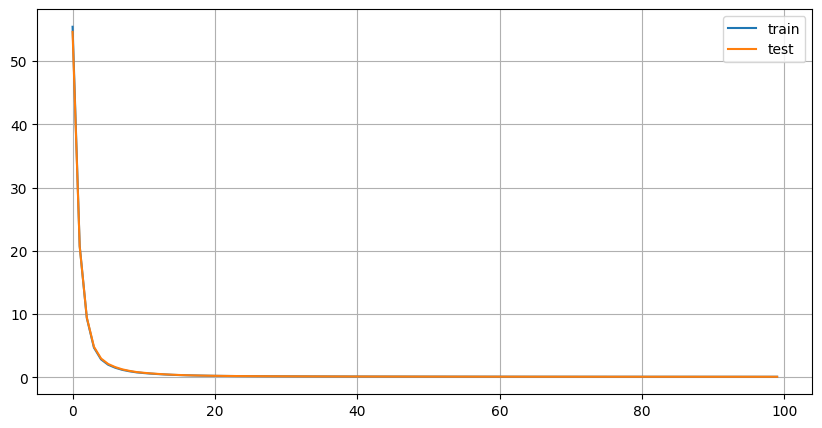

In [ ]:
plt.figure(figsize=(10,5))
plt.grid()

plt.plot(mse_train, label = 'train')
plt.plot(mse_test, label = 'test')
plt.legend()

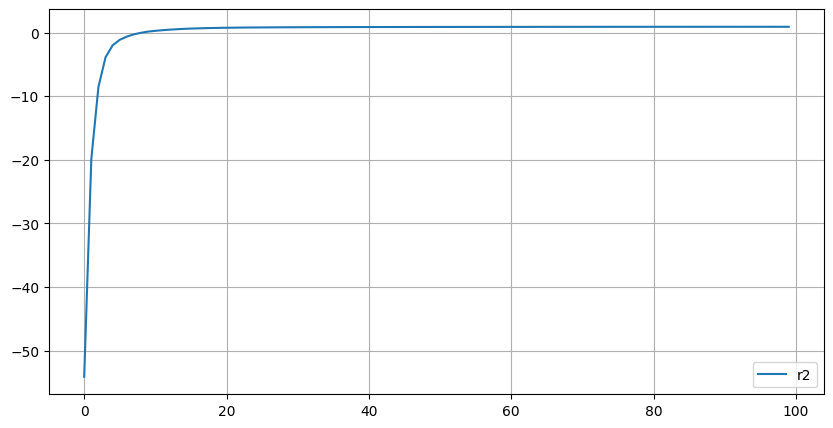

In [ ]:
plt.figure(figsize=(10,5))
plt.grid()

plt.plot(r2, label = 'r2')
plt.legend()

In [ ]:
np.dot(X_test, w) * df[goal].std() + df[goal].mean()

array([60.1482498 , 65.19485544, 77.7785524 , ..., 80.7881969 ,
       61.14828697, 67.77683964])

In [ ]:
np.array(y_test * df[goal].std() + df[goal].mean())

array([60., 62., 75., ..., 81., 63., 67.])

In [ ]:
# массив результатов
r2_shuffles = []

for i in range(2):
    print(f'Итерация {i + 1}')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    w, mse_train, mse_test, r2 = SGD(X_train, y_train, y_test)
    r2_shuffles.append(r2_score(y_test, np.dot(X_test,w)))

Итерация 1
Выполнено: 0 %
MSE train: 55.38165418825314
MSE test: 55.00377916106688
R2: -53.53236488276789
Выполнено: 1 %
MSE train: 22.048791010690763
MSE test: 21.841433986496586
R2: -20.654240233689006
Выполнено: 2 %
MSE train: 9.886492297642032
MSE test: 9.757241949826001
R2: -8.673616729120772
Выполнено: 3 %
MSE train: 5.085013591723862
MSE test: 5.006190218827273
R2: -3.9632842660903673
Выполнено: 4 %
MSE train: 3.191257034991064
MSE test: 3.1416384205385706
R2: -2.114712757769877
Выполнено: 5 %
MSE train: 2.1316352854905247
MSE test: 2.1031396041354595
R2: -1.0851144783392428
Выполнено: 6 %
MSE train: 1.5484386218422026
MSE test: 1.533193692357327
R2: -0.520053333476554
Выполнено: 7 %
MSE train: 1.2032585817533017
MSE test: 1.1960739820066504
R2: -0.18582293450373655
Выполнено: 8 %
MSE train: 0.9832035463257567
MSE test: 0.9795703632759494
R2: 0.028825122686834792
Выполнено: 9 %
MSE train: 0.812614002496822
MSE test: 0.811620082414423
R2: 0.19533597226472887
Выполнено: 10 %
MSE t

Text(0.5, 1.0, 'R2 в результате перемешки')

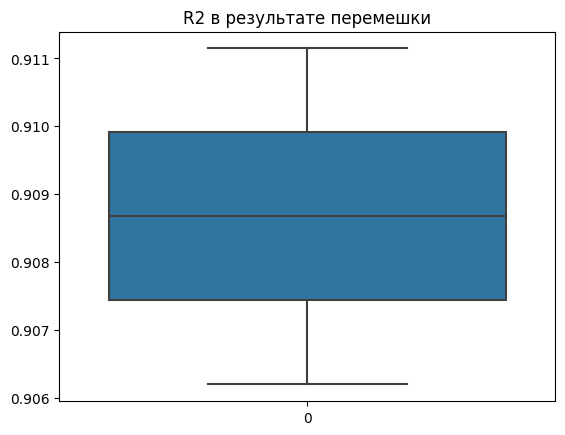

In [ ]:
sns.boxplot(r2_shuffles).set_title('R2 в результате перемешки')

In [ ]:
grid = {'penalty': ['l1', 'l2'],
        'alpha': [1e-3, 1e-4, 1e-5, 1e-6, 1e-7]}

reg = SGDRegressor()
gs = GridSearchCV(reg, grid, cv=5)

gs.fit(X_train, y_train)
gs.best_params_, gs.best_score_

({'alpha': 1e-06, 'penalty': 'l1'}, 0.9275039742932126)

In [ ]:
print('R2 SGD: ', r2_score(y_test, gs.predict(X_test)))

R2 SGD:  0.9303739162536514


In [ ]:
r2_regular = []

for i in range(30):
    print(f'Итерация {i + 1}')

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    grid = {'penalty': ['l1', 'l2'],
            'alpha': [1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]}

    reg = SGDRegressor()
    gs = GridSearchCV(reg, grid, cv=5, scoring = 'r2')

    gs.fit(X_train, y_train)
    print(gs.best_score_)
    r2_regular.append(r2_score(y_test, gs.predict(X_test)))

Итерация 1
0.9286279342891977
Итерация 2
0.9286101770754547
Итерация 3
0.9288085864712008
Итерация 4
0.9284643230829127
Итерация 5
0.9273369539417168
Итерация 6
0.927714774120495
Итерация 7
0.9276262175273036
Итерация 8
0.9286700062308659
Итерация 9
0.9280657934227488
Итерация 10
0.9287225080657405
Итерация 11
0.927637487498105
Итерация 12
0.9285199126734746
Итерация 13
0.9281087930843768
Итерация 14
0.9276845639825162
Итерация 15
0.9283026944107693
Итерация 16
0.928587883128575
Итерация 17
0.9283367948292989
Итерация 18
0.9287060026062173
Итерация 19
0.9288939989360809
Итерация 20
0.9284705801733395
Итерация 21
0.9285804410660973
Итерация 22
0.9276241662417644
Итерация 23
0.9290972334628537
Итерация 24
0.9288656215694415
Итерация 25
0.929559551646879
Итерация 26
0.9278772569382504
Итерация 27
0.9286617411655659
Итерация 28
0.9280659080659225
Итерация 29
0.9282690214477732
Итерация 30
0.9275898522241078


Text(0.5, 1.0, 'R2 в результате перемешки + регуляризация')

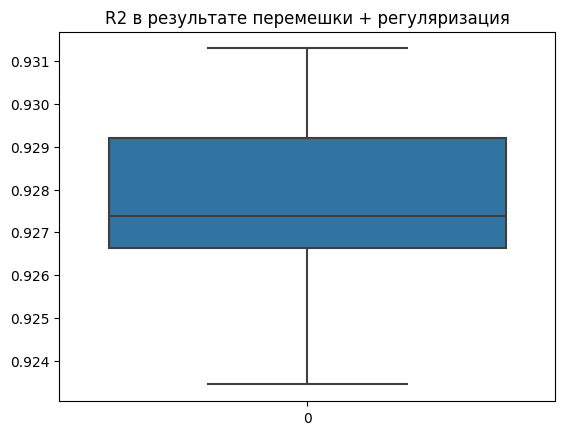

In [ ]:
sns.boxplot(r2_regular).set_title('R2 в результате перемешки + регуляризация')

In [ ]:
gs.predict(X_test) * df[goal].std() + df[goal].mean()

array([63.39393993, 69.36623808, 68.18178429, ..., 63.30854588,
       67.81166952, 64.77867087])

In [ ]:
np.array(y_test * df[goal].std() + df[goal].mean())

array([66., 70., 68., ..., 64., 67., 63.])